In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

In [5]:
indir=join(RESULTS,"mttrace")
in_prefix = '2020_11_18'
mapq = "mapq_0"
num_reads = 200
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,"mapq_0")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,"mapq_0")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")

coverage_pbmc_j_dir = join(pbmc_j_indir,pbmc_j+"_scPileup_200")
coverage_pbmc_p_dir = join(pbmc_p_indir,pbmc_p+"_scPileup_200")

concat_pbmc_j_dir = join(pbmc_j_indir,"scPileup_concat_200")
concat_pbmc_p_dir = join(pbmc_p_indir,"scPileup_concat_200")

In [6]:
min_cells=100
min_reads=100
topN=0
min_het_cells=10
het_thresh=0.1

In [7]:
from src.utils.parse_config import read_config_file
p = read_config_file("parameters/2020_11_18_Croker_mito.yaml")

mt_ref_fa = p["mt_ref_fa"]

In [8]:
dirname = f"minC{min_cells}_minR{min_reads}_topN{topN}_hetC{min_het_cells}_hetT{het_thresh}"
outdir = join(indir, f"lineage_trace/{in_prefix}/PBMC_P/report", dirname)
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/2020_11_18/PBMC_P/report/minC100_minR100_topN0_hetC10_hetT0.1'

### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [9]:
print(mt_ref_fa)
print(maxBP)
print(coverage_pbmc_p_dir)
print(concat_pbmc_p_dir)

/data2/mito_lineage/data/external/GRCh38_MT_blacklist/chrM.fasta
16571
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/PBMC_P_scPileup_200
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/scPileup_concat_200


In [10]:
pbmc_p_AF_by_cell, pbmc_p_BQ_by_cell, pbmc_p_af, pbmc_p_bq_df, pbmc_p_nt_df = calculate_af(coverage_pbmc_p_dir, concat_pbmc_p_dir, ref_fasta=mt_ref_fa, 
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads, 
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 1
topN 0
Number of positions to keep : 16568
Number of cells to keep : 3266
G not found for TTACTCATCCCAGCAG-1
G not found for ACAGAAAGTTCTTTGT-1
T not found for GAGCATTCATCCTCGT-1
G not found for CTCCCAAGTCCCTAAA-1
G not found for ATTACTCAGTAGCAAT-1
T not found for ACTATTCAGACTCTTG-1
T not found for AGCTGGCCAATTCGTG-1
C not found for GGAGGATTCCGGAAAG-1
A not found for AACCAACCAAGGCGTA-1
G not found for TGCTCACAGGACTTTC-1
G not found for TGTGACAGTCAGTGCC-1
G not found for GCGATTAGTACTTCAG-1
coverage not found for GGTGTCGGTGTGTGTT-1
T not found for TTGTTCAGTCTAAAGA-1
C not found for AACGTACTCAGGGTTT-1
coverage not found for TACGCCTTCTCCCTTT-1
C not found for ACCAAACTCGAGGCTC-1
T not found for ATTACCTTCTTAAGCG-1
T not found for AGGCGTCCACGCGCAT-1
coverage not found for GTAGACTCAATGATGA-1
coverage not found for TTGCTTAAGGTCGGTA-1
A not found for TAGCGGCAGTGTCCCG-1
coverage not found for ACTACGACATCACAGT-1
A not found for CTAACTTGTGGAAGCT-1
G not found for TTACTCATCCCAGCAG-1
G

In [11]:
print(f"Number of positions with heteroplasmy fraction above 0: {(pbmc_p_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 376


cmap None


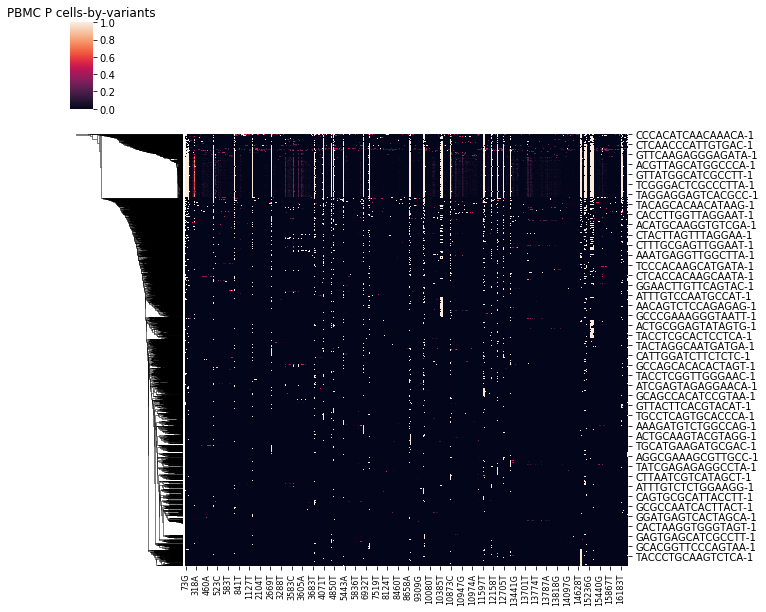

In [12]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
plt.savefig(join(outdir,"pbmc_p_variants.png"))

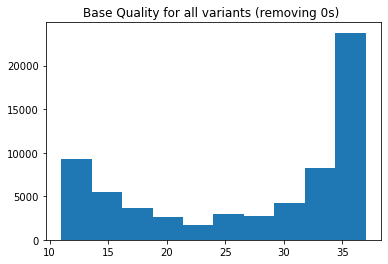

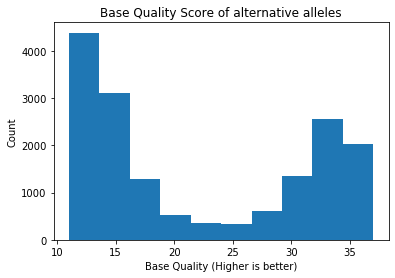

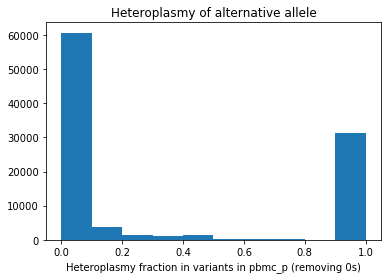

In [13]:
%matplotlib inline
f = plt.figure()
bq_vals = pbmc_p_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "pbmc_p_base_quality.png"))

plt.figure()
plt.hist(pbmc_p_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "pbmc_p_base_quality_altAllele.png"))


f = plt.figure()
af_vals = pbmc_p_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in pbmc_p (removing 0s)")
plt.savefig(join(outdir, "pbmc_p_heteroplasmy_values.png"))


# pbmc_j

In [14]:
pbmc_j_AF_by_cell, pbmc_j_BQ_by_cell, pbmc_j_af, pbmc_j_bq_df, pbmc_j_nt_df = calculate_af(coverage_pbmc_j_dir, concat_pbmc_j_dir, ref_fasta=mt_ref_fa,
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, 
                                                                                           min_cells=min_cells, min_reads=min_reads,
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 3
topN 0
Number of positions to keep : 16568
Number of cells to keep : 2744
Positions that pass het filter: 391


cmap None


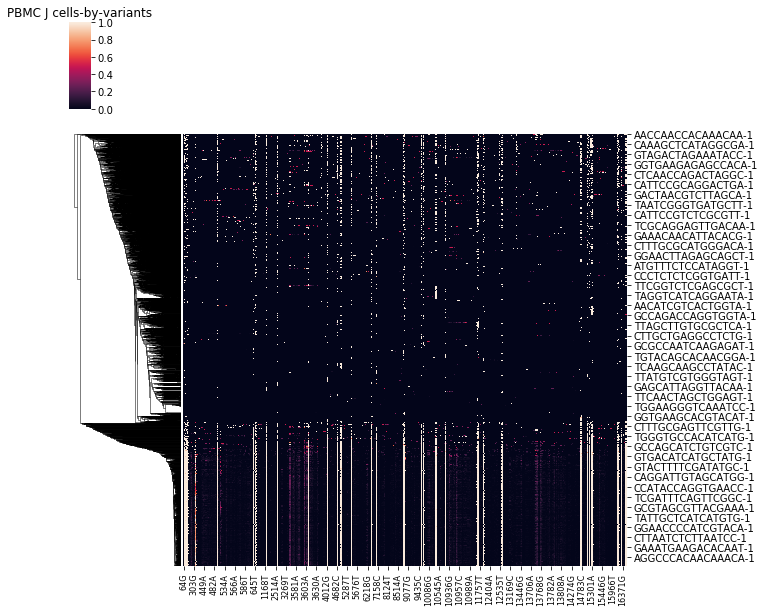

In [15]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_j_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC J cells-by-variants")
plt.savefig(join(outdir,"pbmc_j_variants.png"))

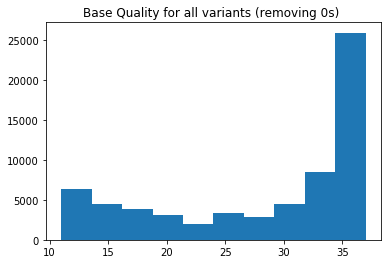

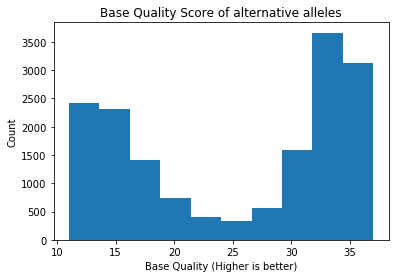

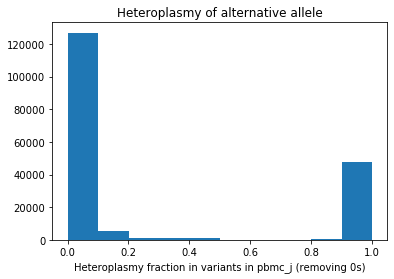

In [16]:
%matplotlib inline
f = plt.figure()
bq_vals = pbmc_j_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "pbmc_j_base_quality.png"))

plt.figure()
plt.hist(pbmc_j_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "pbmc_j_base_quality_altAllele.png"))


f = plt.figure()
af_vals = pbmc_j_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in pbmc_j (removing 0s)")
plt.savefig(join(outdir, "pbmc_j_heteroplasmy_values.png"))


## Merge the two 

In [17]:
pbmc_j_AF_by_cell.index = pbmc_j_AF_by_cell.index + "_pbmc_j"
pbmc_p_AF_by_cell.index = pbmc_p_AF_by_cell.index + "_pbmc_p"


In [18]:
all_cells = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
all_cells_var_overlap = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,73G,146C,199C,263G,300C,301C,303G,310C,318A,337T,...,15966T,15974T,16013T,16066T,16166T,16223T,16295T,16298C,16362C,16519C
AAGGAGCCAAGTCCTA-1_pbmc_p,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
TACCCTGCAGGTAGGT-1_pbmc_p,1.0,1.0,1.00,1.000000,0.064103,0.014706,0.137931,0.671429,0.090909,0.00000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.993671,0.0,0.0,1.0
TCACTCGCATCGACCG-1_pbmc_p,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
CTCAGCTCAAGATGCG-1_pbmc_p,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
CACAACACAATTGCCA-1_pbmc_p,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGCAGGTCTTCTCTC-1_pbmc_j,1.0,1.0,1.00,0.989362,0.121212,0.033898,0.000000,0.916667,0.000000,0.00625,...,0.0,0.0,0.007407,0.0,0.0,0.993976,1.000000,0.0,1.0,1.0
CTTGAAGTCCCACTAC-1_pbmc_j,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
GAAATGATCACACGTA-1_pbmc_j,0.0,0.0,0.00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
GGTGCTGGTTTAGGAA-1_pbmc_j,0.0,0.0,0.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0


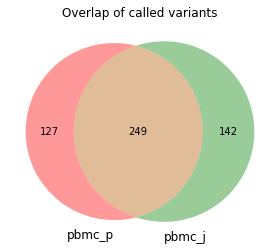

In [20]:
%matplotlib inline
venn2([set(pbmc_p_AF_by_cell.columns.values),set(pbmc_j_AF_by_cell.columns.values)],set_labels=["pbmc_p","pbmc_j"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [ ]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [26]:
row_meta = pd.concat((pd.DataFrame(index=pbmc_j_AF_by_cell.index, data={"Sample":["pbmc_j"]*pbmc_j_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= pbmc_p_AF_by_cell.index, data={"Sample":["pbmc_p"]*pbmc_p_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
TCGAGCGGTTACTTTC-1_pbmc_p,pbmc_p
GGTGAAGAGGCAAGCT-1_pbmc_p,pbmc_p
CACCACTTCCCTACCA-1_pbmc_p,pbmc_p
CTGAATGAGTCAGCCC-1_pbmc_p,pbmc_p
CTCAGCTAGGGTGTTG-1_pbmc_p,pbmc_p
...,...
ACCGCAGTCGACGGAA-1_pbmc_j,pbmc_j
CTCTAGCTCTTAAGCG-1_pbmc_j,pbmc_j
GTCCATCGTTTCCACC-1_pbmc_j,pbmc_j
TAGGTCAAGTAGCAAT-1_pbmc_j,pbmc_j


cmap None


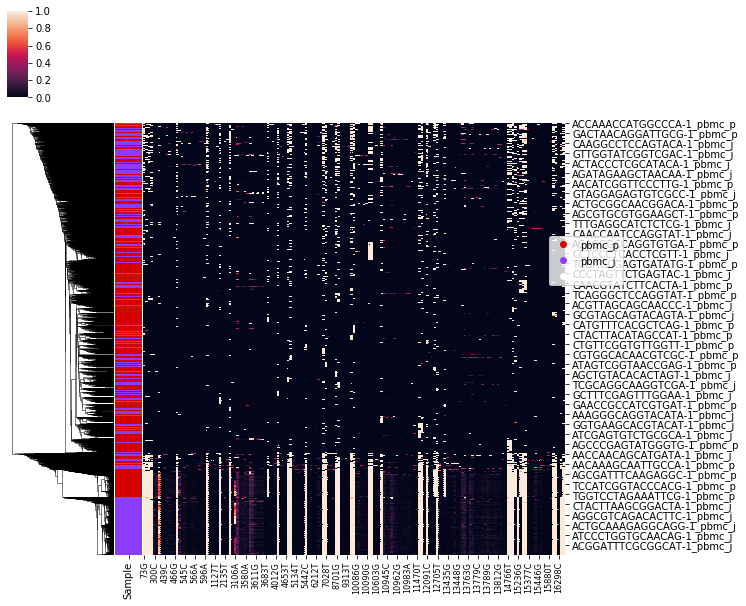

In [27]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

cmap None


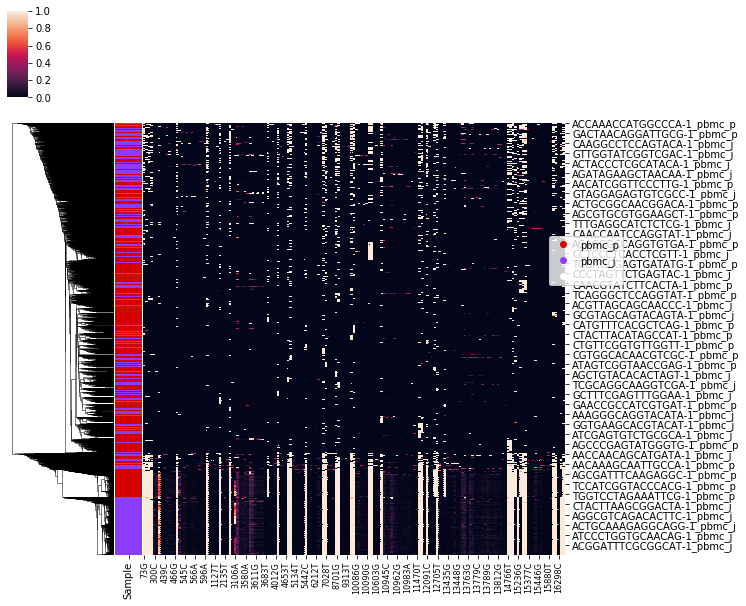

In [28]:
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

## Plot number of overlapping positions from pbmc_j and without

### With all variants

cmap None


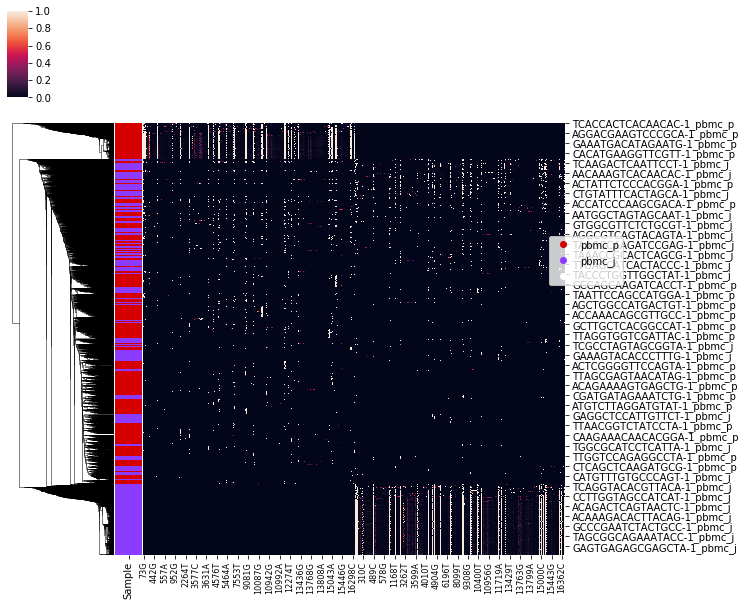

In [29]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=pbmc_j_cell, data={"Sample":["pbmc_j"]*pbmc_j_cell.shape[0]}),
#            pd.DataFrame(index=pbmc_p_cell, data={"Sample":["pbmc_p"]*pbmc_p_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=pbmc_j_AF_by_cell.index, data={"Sample":["pbmc_j"]*pbmc_j_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= pbmc_p_AF_by_cell.index, data={"Sample":["pbmc_p"]*pbmc_p_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

In [30]:
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/2020_11_18/PBMC_P/report/minC100_minR10_topN0_hetC10_hetT0.2'

In [21]:
g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)


NameError: name 'all_cells' is not defined

## Scatter the average AF in both samples for each position 


In [ ]:
#pd.concat((pbmc_p_af, pbmc_j_af))
import numpy as np
overlap_inds = np.array(list(map(lambda x: int(x[:-1]), all_cells.columns)))
print(overlap_inds)
merged_af = pd.DataFrame({"pbmc_p":pbmc_p_af.loc[overlap_inds,"AF"], "pbmc_jL":pbmc_j_af.loc[overlap_inds, "AF"]})
merged_af = merged_af.fillna(0)
sns.pairplot(merged_af)
plt.savefig(join(outdir, "heteroplasmy_across_samples"))

In [ ]:
plt.hist((merged_af['pbmc_p'].astype(float)))
plt.yscale('log')

## Just using CD34 with no pbmc_jL

### Here we compare the rest of sequencing techniques done and see if we see the same variants, this ensuring the differences are consistent across the techniques and not technical noise.

In [ ]:
from src.utils import construct_pca
%matplotlib inline
construct_pca(pbmc_p_AF_by_cell.copy(), save_f=join(outdir, "pbmc_p_pca"))

In [ ]:

%matplotlib inline
construct_pca(all_cells_var_overlap.copy(), save_f=join(outdir, "pca"))

## Het by value

## Clustering

In [ ]:
pbmc_p_AF_by_cell

In [ ]:
pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[:,(pbmc_p_AF_by_cell>0).any(axis=0)]
sns.clustermap(np.sqrt(pbmc_p_AF_by_cell))
plt.savefig(join(outdir, 'pbmc_p_clust.png'))

In [ ]:
pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[:,(pbmc_j_AF_by_cell>0).any(axis=0)]
sns.clustermap(np.sqrt(pbmc_j_AF_by_cell))
plt.savefig(join(outdir, 'pbmc_j_clust.png'))